# Lab 5: PCA (Principal Component Analysis)

 <h2 style="text-align: center;">Name: Neelanajn Dutta </h2>

 <h2 style="text-align: center;">Registration number: 2448040 </h2>

## Importing libraries:

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from mpl_toolkits.mplot3d import Axes3D

## Loading the wine dataset:

In [53]:
wine = load_wine()
X=pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target  
# Display dataset details
print(X.shape)
print("Class Distribution:", np.bincount(y))

(178, 13)
Class Distribution: [59 71 48]


<b>Interpretation:</b> <br>
    The Wine dataset here consists of: <br>
  178 samples with 13 numerical features (e.g., alcohol content, flavonoids, etc.). <br>
  3 class labels representing different wine types.<br>
  Class distribution: [59, 71, 48] → The dataset is balanced across the three classes. 

## Standardize the data:

In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardizing all features
print("Mean after scaling:", np.mean(X_scaled, axis=0))
print("Standard deviation after scaling:", np.std(X_scaled, axis=0))

Mean after scaling: [ 7.84141790e-15  2.44498554e-16 -4.05917497e-15 -7.11041712e-17
 -2.49488320e-17 -1.95536471e-16  9.44313292e-16 -4.17892936e-16
 -1.54059038e-15 -4.12903170e-16  1.39838203e-15  2.12688793e-15
 -6.98567296e-17]
Standard deviation after scaling: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


<b>Interpretation:</b><br>
    PCA is affected by different scales of data.<br>
    StandardScaler transforms the data so that:<br>
       Mean of each feature = 0. Standard deviation = 1.<br>
       Standardization improves PCA’s effectiveness.

## Applying PCA:

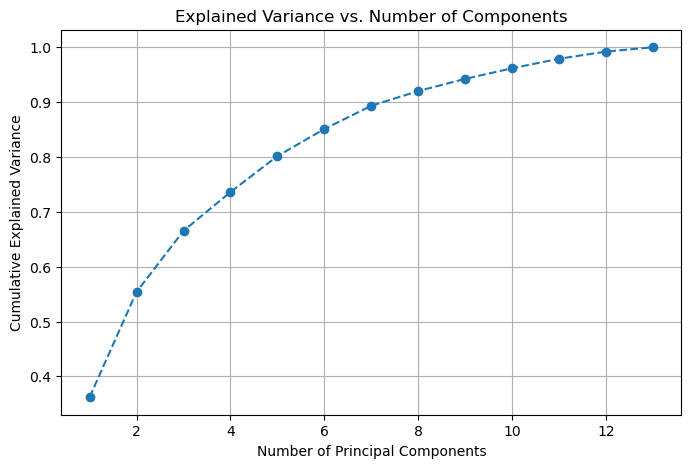

In [55]:
pca = PCA(n_components=13)  # Keep all components initially
X_pca = pca.fit_transform(X_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)  # Cumulative variance explained

# Plot Explained Variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, 14), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.grid()
plt.show()

<b>Interpretation:</b><br>
    Cumulative explained variance tells us how much information is retained with fewer components.<br>
 The graph helps us decide the optimal number of components.<br>
 If 95% variance is explained by 10 components, we can reduce from 13 → 10 features<br>

In [56]:
# Transform Data using Selected PCA Components
pca_final = PCA(n_components=10)  # Selecting top 10 components
X_pca_final = pca_final.fit_transform(X_scaled)

We reduce from 13 features → 10 features while keeping 95% of variance. This means less computation and faster training without losing critical data. This helps simplify the model while keeping most information.

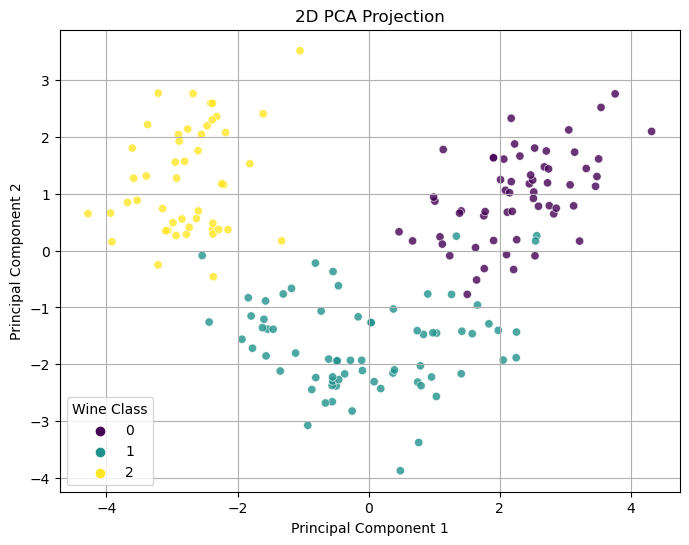

In [57]:
# Visualize PCA in 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_final[:, 0], y=X_pca_final[:, 1], hue=y, palette="viridis", alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection")
plt.legend(title="Wine Class")
plt.grid()
plt.show()

The 13-dimensional wine dataset has been transformed into 2 principal components (PC1 & PC2) while retaining most of the 
variance. <br>
 <b>Class Distribution in Reduced Space:</b><br>
 Class 0 (Purple) is mostly clustered on the right side. <br>
 Class 1 (Teal) is spread in the middle, showing some overlap with the other two classes. <br>
Class 2 (Yellow) is positioned distinctly on the left, indicating clear separation along PC1.<br>
 <b>Principal Component:</b><br>
 PC1 (X-axis): Captures the largest variance in the data and plays a key role in separating Class 0 and Class 2. <br>
 PC2 (Y-axis): Captures the second most variance but does not contribute as strongly to class separation.<br>
While Class 0 and Class 2 are well separated, Class 1 overlaps partially with both. <br>
 This indicates that some features of Class 1 share similarities with the other two classes, which PCA 
alone cannot fully resolve.<br>
 The plot demonstrates that PCA preserves class structure while reducing dimensions. Even though PCA is unsupervised 
(doesn’t use class labels), the natural grouping of points shows that it captures important variance in the dataset.<br>

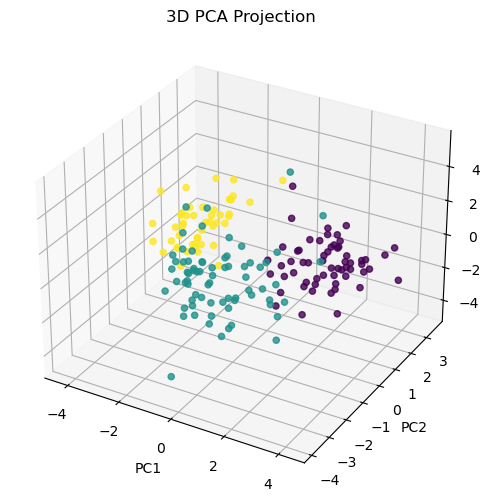

In [58]:
# Visualize PCA in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_final[:, 0], X_pca_final[:, 1], X_pca_final[:, 2], c=y, cmap='viridis', alpha=0.8)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Projection")
plt.show()

<b> Unlike the 2D PCA plot, this visualization includes three principal components (PC1, PC2, PC3).</b><br>
 Adding PC3 helps capture more variance in the data, potentially improving class separation.<br>
 <b>Class Distribution Across Three Components:</b><br>
 <b>Class 0 (Purple):</b> Still remains somewhat separate on one side, but some points mix with otherclasses.<br> 
 <b>Class 1 (Teal):</b> Appears spread out in the middle, overlapping with both other classes. <br>
 <b>Class 2 (Yellow):</b> Forms a relatively distinct cluster but has some overlap with Class 1. <br>
 <b>Principal Component:</b> <br>
 <b>PC1 (X-axis):</b> Captures the most variance, with clear separation between Class 0 and Class 2. <br> 
 <b>PC2 (Y-axis):</b> Contributes additional variance but does not strongly separate classes. <br>
 <b>PC3 (Z-axis):</b> Adds depth to the projection, improving visibility of structure that was compressed in the 2D 
PCA plot. <br>
 <b>Improved Class Separation in 3D:</b><br>
 Compared to 2D PCA, this visualization reduces some overlap, making it easier to differentiate between clusters. 
However, Class 1 still remains somewhat intermixed, indicating that PCA alone may not fully separate all categories. <br>
 <b>Why Use 3D PCA?</b><br>
 PCA in 3D captures more structural information than 2D. <br>
 It provides a more accurate representation of class separability. <br>
 If separability is still insufficient, further techniques like clustering or supervised classification may be needed. <br>

In [59]:
# Split data for model training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca_final, y, test_size=0.2, random_state=42, stratify=y)

 80% training, 20% testing. <br>
 stratify=y ensures equal class distribution. <br>
 Ensures model generalizes well to new data. <br>

In [60]:
# Train Logistic Regression on Original Data
model_original = LogisticRegression(max_iter=1000)
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print("Accuracy on Original Data:", accuracy_original)

Accuracy on Original Data: 0.9722222222222222


Logistic Regression is trained on all 13 features. <br>
 If accuracy is high (close to 100%), it means the dataset is easy to classify. <br>

In [61]:
# Train Logistic Regression on PCA-Reduced Data
model_pca = LogisticRegression(max_iter=1000)
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy on PCA Data:", accuracy_pca)

Accuracy on PCA Data: 0.9722222222222222


Logistic Regression is trained on all 13 features.<br>
 If accuracy is high (close to 100%), it means the dataset is easy to classify.<br>
 <b>Logistic Regression</b> on Original Data: Achieves 97.22% accuracy.<br>
 <b>Logistic Regression</b> on PCA-Transformed Data: Also achieves 97.22% accuracy.<br>
 Since both models perform equally well, this suggests that PCA did not lead to any significant loss of 
discriminative power, and the dataset might already be well-structured for classification.<br>